In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\shubham\acadmics\6th SEM\mini project\project study\3rd meeting\modified_dataset_for_ML.csv")

In [3]:
df.columns

Index(['processed_review', 'sentiment'], dtype='object')

In [4]:
df.head()

,processed_review,sentiment
0,one reviewer mention watch oz episode hooked r...,1
1,wonderful little production film technique una...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter matteis love time money visually stun f...,1


In [5]:
# df.describe
# df.info

# word cloud

In [6]:
from wordcloud import WordCloud

positive_review = df[df['sentiment'] == 1]
negative_review = df[df['sentiment'] == 0]

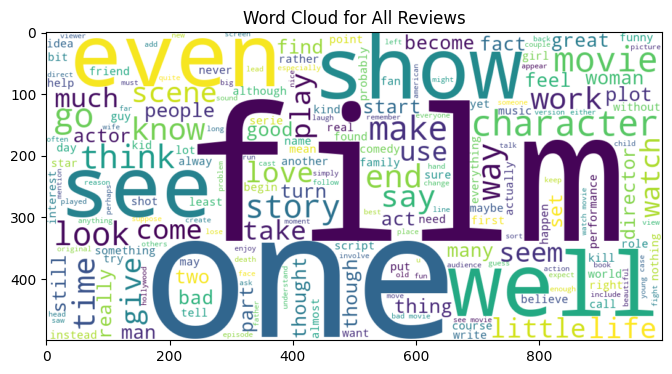

In [7]:
all_text = ' '.join(df['processed_review'].astype(str))

wordcloud_all = WordCloud(width=1000, height=500, background_color='white').generate(all_text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud for All Reviews')
plt.show()

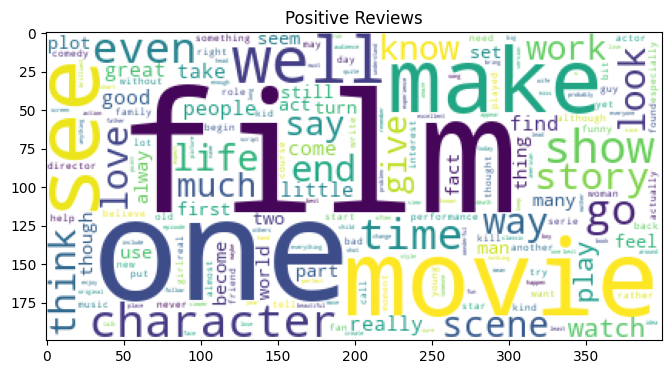

In [8]:
text_positive = ' '.join(positive_review['processed_review'].astype(str))
wordcloud_positive = WordCloud(background_color='white').generate(text_positive)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_positive)
plt.title('Positive Reviews')
plt.show()

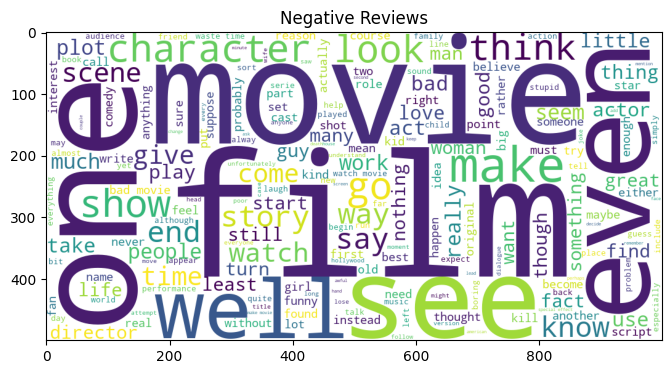

In [9]:
text_negative = ' '.join(negative_review['processed_review'].astype(str))
wordcloud_negative = WordCloud(width=1000, height=500, background_color='white').generate(text_negative)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_negative)
plt.title('Negative Reviews')
plt.show()

In [10]:
print("Number of positive reviews:", len(positive_review))
print("Number of negative reviews:", len(negative_review))

Number of positive reviews: 25000
Number of negative reviews: 25000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_review'].astype(str))
num_unique_words = len(vectorizer.get_feature_names_out())
print(f"Number of unique words: {num_unique_words}")


Number of unique words: 195039


In [12]:
all_text = " ".join(df['processed_review'].astype(str))

# Split the text into words and get unique words using set()
unique_words = set(all_text.split())

num_unique_words = len(unique_words)
print(f"Number of unique words: {num_unique_words}")


Number of unique words: 195063


# TF-IDF Vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfModel = TfidfVectorizer()

print(tfidfModel.fit_transform(df['processed_review']))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4636394 stored elements and shape (50000, 195039)>
  Coords	Values
  (0, 121841)	0.01891636927291804
  (0, 142581)	0.060727062303660075
  (0, 107068)	0.04725652477010123
  (0, 186436)	0.07294583845389475
  (0, 125234)	0.40078351069551776
  (0, 53734)	0.09565352391304881
  (0, 79989)	0.07498958613450396
  (0, 143251)	0.07689323191386806
  (0, 55523)	0.051890105248601825
  (0, 74651)	0.0423882755671217
  (0, 107620)	0.08840646153966977
  (0, 61875)	0.05790182172151849
  (0, 171506)	0.029244115887176927
  (0, 163924)	0.1502545754707332
  (0, 22461)	0.08353972146574169
  (0, 180282)	0.10027262360849053
  (0, 148037)	0.02827010216520098
  (0, 184496)	0.21282065918396245
  (0, 152111)	0.03757295262718466
  (0, 191123)	0.04531670448815355
  (0, 69641)	0.048721794752775785
  (0, 177417)	0.06398235450972359
  (0, 154246)	0.11752475384220767
  (0, 57732)	0.08624136572405403
  (0, 76136)	0.08401420450580042
  :	:
  (49999, 58157)	0.173

In [14]:
# (0, 121841)	0.01891636927291804
# 0-> sentence 1
# 121841--> position in vocabulary 

tfidf_matrix = tfidfModel.fit_transform(df['processed_review'])
print(tfidf_matrix.shape) 

(50000, 195039)


In [15]:
tfidfModel.vocabulary_

{'one': 121841,
 'reviewer': 142581,
 'mention': 107068,
 'watch': 186436,
 'oz': 125234,
 'episode': 53734,
 'hooked': 79989,
 'right': 143251,
 'exactly': 55523,
 'happen': 74651,
 'methe': 107620,
 'first': 61875,
 'thing': 171506,
 'struck': 163924,
 'brutality': 22461,
 'unflinching': 180282,
 'scene': 148037,
 'violence': 184496,
 'set': 152111,
 'word': 191123,
 'go': 69641,
 'trust': 177417,
 'show': 154246,
 'faint': 57732,
 'hearted': 76136,
 'timid': 173781,
 'pull': 136386,
 'punch': 136469,
 'regard': 140410,
 'drug': 48604,
 'sex': 152356,
 'hardcore': 74937,
 'classic': 30791,
 'use': 182188,
 'wordit': 191141,
 'call': 24372,
 'nickname': 116797,
 'give': 69250,
 'oswald': 123563,
 'maximum': 105226,
 'security': 150141,
 'state': 161775,
 'penitentary': 127738,
 'focus': 63062,
 'mainly': 102486,
 'emerald': 51897,
 'city': 30524,
 'experimental': 56497,
 'section': 150114,
 'prison': 134556,
 'cell': 27049,
 'glass': 69361,
 'front': 65511,
 'face': 57358,
 'inwards':

In [16]:
len(tfidfModel.vocabulary_)

195039

In [25]:
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=features_name)

# tfidf_df['sentiment'] = df['sentiment']

In [18]:
print(tfidf_matrix[:500].todense())  # -the matrix size is too large for preview 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
tfidf_matrix.shape

(50000, 195039)